TRAINING MODEL...
{'batch_size': 8, 'learning_rate': 0.001}
>>> Epoch: 0, Average loss: 0.0765152286205973
>>> Epoch: 1, Average loss: 0.0762705174939973
>>> Epoch: 2, Average loss: 0.07624327604259763
>>> Epoch: 3, Average loss: 0.07622831208365304
>>> Epoch: 4, Average loss: 0.07622186413833072
>>> Epoch: 5, Average loss: 0.07621364827666964
>>> Epoch: 6, Average loss: 0.07620542177132197
>>> Epoch: 7, Average loss: 0.07619846612215042
>>> Epoch: 8, Average loss: 0.07619367220572063
>>> Epoch: 9, Average loss: 0.07619355299643109
>>> Epoch: 10, Average loss: 0.07619064904394604
>>> Epoch: 11, Average loss: 0.07619655770914895
>>> Epoch: 12, Average loss: 0.07618501498585654
>>> Epoch: 13, Average loss: 0.07618647991191774
>>> Epoch: 14, Average loss: 0.07618655512730281
>>> Epoch: 15, Average loss: 0.07618877114284606
>>> Epoch: 16, Average loss: 0.07618112684715363
>>> Epoch: 17, Average loss: 0.07617865467355367
>>> Epoch: 18, Average loss: 0.07619885603586833
>>> Epoch: 19, Averag

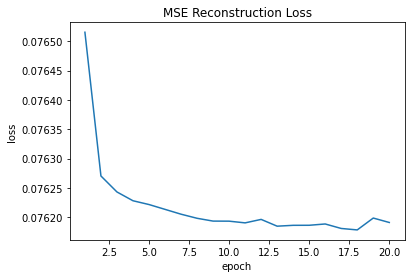

In [1]:
from train import run
path, latent = run()

In [6]:
import json
with open('encode.json') as file:
    encoder = json.load(file)

decoder = {}
for idx, item in enumerate(path):
    ID = item.split('_')[1].split('.')[0]
    decoder[idx] = encoder[ID]

In [160]:
from sklearn.manifold import TSNE
import numpy as np
features = np.asarray(latent, dtype=np.float32)
embedded = TSNE(n_components=2).fit_transform(features)

In [161]:
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA, FastICA
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import euclidean
import numpy as np

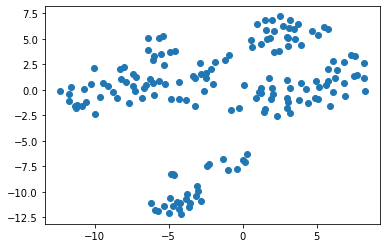

In [181]:
def plot_tsne(xy, colors=None):
    fig = plt.figure()
    #ax = fig.add_subplot(projection='3d')
    ax = fig.add_subplot()
    ax.scatter(xy[:,0], xy[:,1], c=colors)
    plt.show()
    
plot_tsne(embedded)

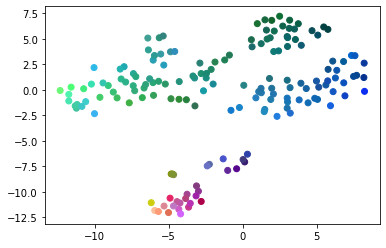

In [182]:
pca = IncrementalPCA(n_components=3)
pca_projection = pca.fit_transform(features)
pca_projection -= np.min(pca_projection, axis=0)
pca_projection /= np.max(pca_projection, axis=0)
plot_tsne(embedded, pca_projection)

In [184]:
from numpy import linalg
similarity_matrix = np.zeros((165, 165))
for i in range(165):
    for j in range(165):
        similarity_matrix[i][j] = features[i].dot(features[j]) / (linalg.norm(features[i])*linalg.norm(features[j]))

In [190]:
query = 10
print('Query:', decoder[query])
similarity_list = []
for i in range(165):
    similarity_list.append(similarity_matrix[i][query])
    
res = sorted(range(len(similarity_list)), key = lambda sub: similarity_list[sub])[-4:]
print('제일 가까운 것')
for idx, i in enumerate(res):
    if idx == 3:
        continue
    print(f'{3-idx}순위: ',decoder[i])
print('제일 안 가까운 것')
res = sorted(range(len(similarity_list)), key = lambda sub: similarity_list[sub])[:4]
for idx, i in enumerate(res):
    if idx == 0:
        continue
    print(f'{idx}순위: ',decoder[i])

Query: /home/hahajjjun/Junha Park/REMIX/data/Maroon 5 - Sugar (Official Music Video)-accompaniment.wav
제일 가까운 것
3순위:  /home/hahajjjun/Junha Park/REMIX/data/Maroon 5 - Lucky Strike Lyrics Video (Overexposed)-accompaniment.wav
2순위:  /home/hahajjjun/Junha Park/REMIX/data/백예린 (Yerin Baek) Antifreeze Lyric Video-accompaniment.wav
1순위:  /home/hahajjjun/Junha Park/REMIX/data/Maroon 5 - Girls Like You ft Cardi B (Official Music Video)-accompaniment.wav
제일 안 가까운 것
1순위:  /home/hahajjjun/Junha Park/REMIX/data/The Chainsmokers - Closer (Official Video) ft Halsey-accompaniment.wav
2순위:  /home/hahajjjun/Junha Park/REMIX/data/YENA (최예나) - SMILEY (Feat BIBI) MV-accompaniment.wav
3순위:  /home/hahajjjun/Junha Park/REMIX/data/Coldplay - Everglow [Single Version] - (Official Video)-accompaniment.wav
